In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import  yaml

with open("/home/mchorse/gpt-neox/benchmarking/configs/inference_test.yml", "r") as f:
    config = yaml.safe_load(f)

models = config["models"]
world_size = config["world_size"]
trials = config["trials"]
max_tokens = config["max_tokens"]

models = [x.split("/")[-1] for x in models]
ds_files = ["/home/mchorse/inference_benchmark/deepspeed/max_tokens_128/world_size_1/{}_float16_benchmark.csv".format(x) for x in models]

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
hf_files = ["/home/mchorse/inference_benchmark/hf/max_tokens_128/world_size_1/{}_float16_benchmark.csv".format(x) for x in models]

In [9]:
ds_dfs = [pd.read_csv(x) for x in ds_files]
hf_dfs = [pd.read_csv(x) for x in hf_files]
ds_means = [x["(e2e) latency"].iloc[3:].mean() for x in ds_dfs]
ds_std = [x["(e2e) latency"].iloc[3:].std() for x in ds_dfs]
hf_means = [x["(e2e) latency"].iloc[3:].mean() for x in hf_dfs]
hf_std = [x["(e2e) latency"].iloc[3:].std() for x in hf_dfs]

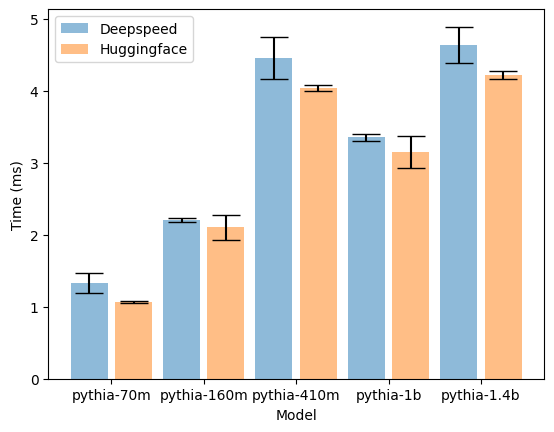

In [11]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Create the bar plot with error bars
ax.bar(
    np.arange(len(ds_means)) - 0.24,
    ds_means, yerr=ds_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Deepspeed')
ax.bar(
    np.arange(len(hf_means)) + 0.24,
    hf_means, yerr=hf_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Huggingface')

# Set the x-axis tick labels to be the index of the values list
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Time (ms)')

plt.legend()
plt.show()

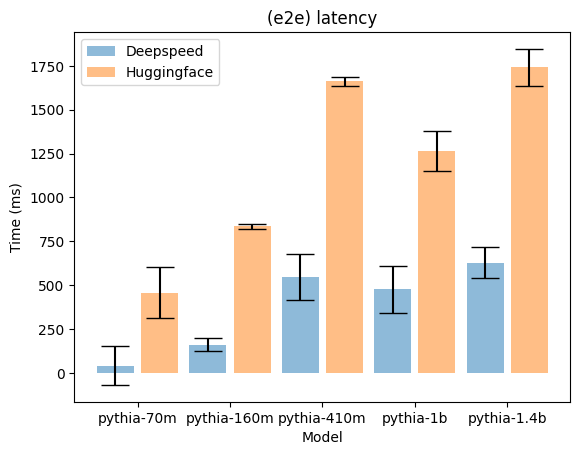

In [25]:
metric_keys = ['mean', 'percentiles', 'std'] 
metrics_ds = {}
metrics_hf = {}

for c in ['(e2e) latency']:
    model_names = []

    for k in metric_keys:
        metrics_ds[k] = []
        metrics_hf[k] = []
    for model in models:
        f = 'output/hf/pythia-{}_float16_max_tokens_50_benchmark.csv'.format(model)
        model_names.append('pythia-' + model)
        df_hf = pd.read_csv(f, index_col=0) * 1000
        df_ds = pd.read_csv('output/deepspeed/pythia-{}_float16_max_tokens_50_benchmark.csv'.format(model)) * 1000



        metrics_ds['percentiles'].append(
            np.percentile(df_ds[c].values, [50, 90, 95, 99, 99.9]))
        ds_means.append(df_ds[c].mean())
        ds_std.append(df_ds[c].std())


        metrics_hf['percentiles'].append(
            np.percentile(df_hf[c].values, [50, 90, 95, 99, 99.9]))
        hf_means.append(df_hf[c].mean())
        hf_std.append(df_hf[c].std())

    # Create the figure and axes objects
    fig, ax = plt.subplots()
    # Create the bar plot with error bars
    ax.bar(
        np.arange(len(ds_means)) - 0.24,
        ds_means, yerr=ds_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Deepspeed')
    ax.bar(
        np.arange(len(hf_means)) + 0.24,
        hf_means, yerr=hf_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Huggingface')

    # Set the x-axis tick labels to be the index of the values list
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(model_names)

    # Set the labels and title
    ax.set_xlabel('Model')
    ax.set_ylabel('Time (ms)')
    ax.set_title(c)
    plt.legend()
    plt.show()

In [15]:
hf_means, ds_means

([457.2912549972534,
  835.6960940361023,
  1661.2071299552917,
  1264.3904304504395,
  1742.1909761428833],
 [0.041902551651000944,
  0.16168268203735348,
  0.5471136331558227,
  0.47728944540023804,
  0.628819625377655])

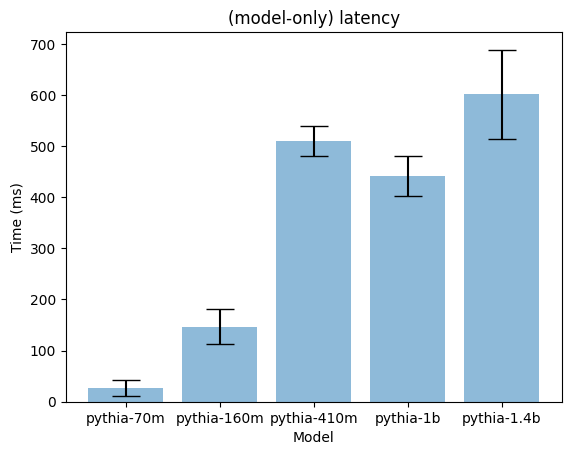

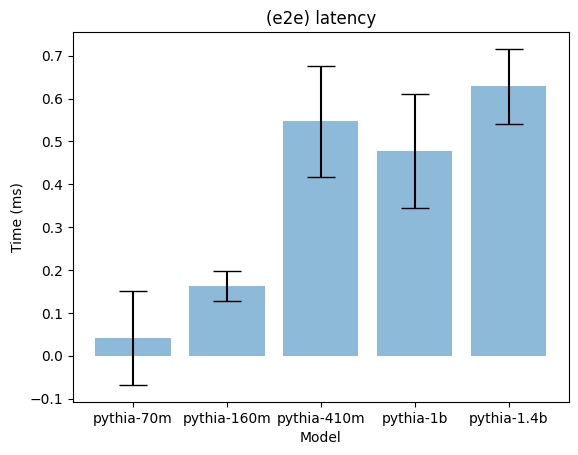

In [14]:
metric_keys = ['mean', 'percentiles', 'std'] 


for c in ['(e2e) latency']:
    model_names = []
    metrics = {}
    for k in metric_keys:
        metrics[k] = []
    for model in models:
        f = 'output/hf/pythia-{}_float16_max_tokens_50_benchmark.csv'.format(model)
        model_names.append('pythia-' + model)
        df = pd.read_csv(f, index_col=0)



        metrics['percentiles'].append(
            np.percentile(df[c].values, [50, 90, 95, 99, 99.9]))
        metrics['mean'].append(df[c].mean())
        metrics['std'].append(df[c].std())

    # Create the figure and axes objects
    fig, ax = plt.subplots()
    # Create the bar plot with error bars
    ax.bar(
        np.arange(len(metrics['mean'])),
        metrics['mean'], yerr=metrics['std'], align='center', alpha=0.5, ecolor='black', capsize=10)

    # Set the x-axis tick labels to be the index of the values list
    ax.set_xticks(np.arange(len(files)))
    ax.set_xticklabels(model_names)

    # Set the labels and title
    ax.set_xlabel('Model')
    ax.set_ylabel('Time (ms)')
    ax.set_title(c)
    plt.show()

In [15]:
metrics['std'], metrics['mean']

([0.11010136395250561,
  0.03499226233139127,
  0.12966630549764685,
  0.1337126746635157,
  0.0871964403151473],
 [0.041902551651000944,
  0.16168268203735348,
  0.5471136331558227,
  0.47728944540023804,
  0.628819625377655])

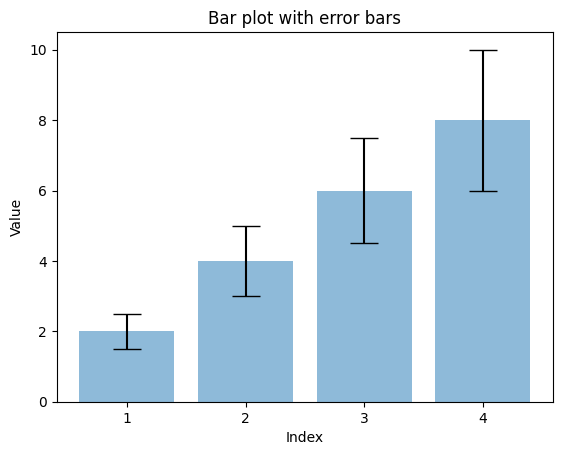

In [26]:
# Example data
values = [2, 4, 6, 8]
errors = [0.5, 1, 1.5, 2]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Create the bar plot with error bars
ax.bar(np.arange(len(values)), values, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)

# Set the x-axis tick labels to be the index of the values list
ax.set_xticks(np.arange(len(values)))
ax.set_xticklabels(np.arange(1, len(values) + 1))

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Bar plot with error bars')

# Show the plot
plt.show()